In [59]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import random
import PIL.ImageDraw as ImageDraw
import PIL.Image as Image
import os.path
import cv2
from skimage.exposure import match_histograms

In [60]:
def equlizer(img):
  a = np.zeros((256,),dtype=np.float16)
  b = np.zeros((256,),dtype=np.float16)
  height,width=img.shape
  #finding histogram
  for i in range(width):
      for j in range(height):
          g = img[j,i]
          a[g] = a[g]+1
  #performing histogram equalization
  tmp = 1.0/(height*width)
  b = np.zeros((256,),dtype=np.float16)
  for i in range(256):
      for j in range(i+1):
          b[i] += a[j] * tmp;
      b[i] = round(b[i] * 255);
  # b now contains the equalized histogram
  b=b.astype(np.uint8)
  #Re-map values from equalized histogram into the image
  for i in range(width):
      for j in range(height):
          g = img[j,i]
          img[j,i]= b[g]
  return img 

In [61]:
def histogramMatcher(source, template):
  oldshape = source.shape
  source = source.ravel()
  template = template.ravel()
  # get the set of unique pixel values and their corresponding indices and
  # counts
  s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                          return_counts=True)
  t_values, t_counts = np.unique(template, return_counts=True)
  # take the cumsum of the counts and normalize by the number of pixels to

  # getting empirical cumulative distribution functions for the source and
  s_quantiles = np.cumsum(s_counts).astype(np.float64)
  s_quantiles = s_quantiles/s_quantiles[-1]
  t_quantiles = np.cumsum(t_counts).astype(np.float64)
  t_quantiles = t_quantiles/t_quantiles[-1]

  # interpolate linearly to find the pixel values in the template image
  # that correspond most closely to the quantiles in the source image
  interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)

  return interp_t_values[bin_idx].reshape(oldshape)


In [62]:
img_1_gray = cv2.imread('fig2.png',cv2.IMREAD_GRAYSCALE)
img_2_gray = cv2.imread('fig3.png',cv2.IMREAD_GRAYSCALE)

In [63]:
img_1_gray_equ = equlizer(img_1_gray)
img_2_gray_equ = equlizer(img_2_gray)


In [68]:
matched = match_histograms(img_1_gray_equ, img_2_gray_equ)
matched_NOLIB = histogramMatcher(img_1_gray_equ, img_2_gray_equ)

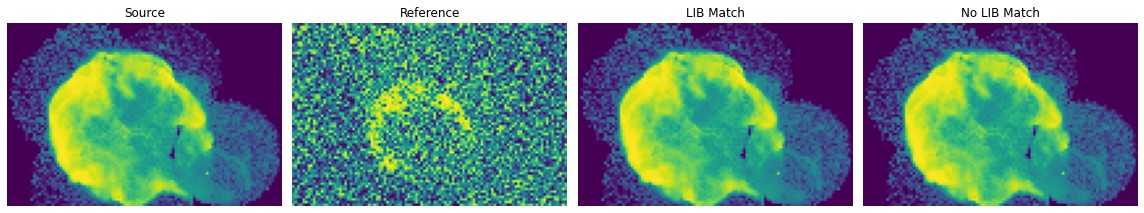

In [74]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=1, ncols=4, figsize=(16, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3,ax4):
    aa.set_axis_off()

ax1.imshow(img_1_gray_equ)
ax1.set_title('Source')
ax2.imshow(img_2_gray_equ)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('LIB Match')
ax4.imshow(matched_NOLIB)
ax4.set_title('No LIB Match')

plt.tight_layout()
plt.show()